# Assessment Problems

## Imports

In [3]:
# Date and time handling
import datetime as dt

# Data manipulation
import pandas as pd

# Yahoo Finance data
import yfinance as yf

# Plotting
import matplotlib.pyplot as plt

# Date formatting for plots
import matplotlib.dates as mdates

# Listing files in a folder
import os

## Problem 1: Data from yfinance

This notebook relies on market data obtained through the `yfinance` library (see the [project documentation](https://github.com/ranaroussi/yfinance)), which is an open-source tool that allows to retrieve and download financial data from Yahoo Finance. 

The analysis is focused on five FAANG stocks: 

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)

We can use the `Tickers` class from the `yfinance` library to fetch these tickers and verify that they are recognised correctly before downloading the historical data.

In [8]:
# Fetch stocks tickers for analysis
# https://ranaroussi.github.io/yfinance/reference/api/yfinance.Tickers.html#yfinance.Tickers
tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

# Display tickers
tickers

yfinance.Tickers object <META,AAPL,AMZN,NFLX,GOOG>

### Download data and create a DataFrame

We will use the `yf.download()` function (see the [official documentation](https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download)) to download hourly market data for the last five days for the defined FAANG stocks. 

The downloaded data is stored in a [Pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) for further analysis. 

In [10]:
# Create a dataframe and download historical data
# Period specifies the total duration of data to fetch
# Interval specifies the frequency of data points
df = yf.download(('META AAPL AMZN NFLX GOOG'), period='5D', interval='1h', auto_adjust=False)

# Display the first 3 rows of the data
df.head(3)

[*********************100%***********************]  5 of 5 completed


Price                       Adj Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-15 14:30:00+00:00  274.144989  223.029999  307.730011  641.054993   
2025-12-15 15:30:00+00:00  275.510010  224.389999  308.829987  650.545105   
2025-12-15 16:30:00+00:00  274.920013  222.544998  306.142609  650.309998   

Price                                      Close                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-15 14:30:00+00:00  94.004997  274.144989  223.029999  307.730011   
2025-12-15 15:30:00+00:00  94.430000  275.510010  224.389999  308.829987   
2025-12-15 16:30:00+00:00  94.000000  274.920013  222.544998  306.142609   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
Datetime                                          ...                           
2025-12-15 14:30:00+00:00  641.054993  94.004997  ...  280.000000  227.000000   
2025-12-15 15:30:00+00:00  650.545105  94.430000  ...  274.170013  223.039993   
2025-12-15 16:30:00+00:00  650.309998  94.000000  ...  275.540009  224.440002   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
Datetime                                                                
2025-12-15 14:30:00+00:00  310.625000  644.250000  96.000000  8113962   
2025-12-15 15:30:00+00:00  307.730011  640.929993  94.004997  3495538   
2025-12-15 16:30:00+00:00  308.839996  650.619995  94.430000  2136284   

Price                                                          
Ticker                        AMZN     GOOG     META     NFLX  
Datetime                                                       
2025-12-15 14:30:00+00:00  6475168  3980818  2264723  5610795  
2025-12-15 15:30:00+00:00  2713407  1244270  1317447  2675928  
2025-12-15 16:30:00+00:00  2914110  1951626   846923  2181275  

[3 rows x 30 columns]

### Configure filename

Once the data has been downloaded, it needs to be saved using a descriptive filename that indicates the current date and time. 

The process involves three steps:
1. **Obtain the current date and time**: We will use the `now()` classmethod from `datetime` module (see the [official documentation](https://docs.python.org/3/library/datetime.html#datetime.datetime)). `now()` returns the local date and time.
2. **Format the timestamp**: To include the date and time in a filename, we will use the `strftime()` method (see the [official format codes](https://docs.python.org/3/library/datetime.html#format-codes)). We format the timestamp in the `YYYYMMDD-HHmmss` pattern by combining the four-digit year, month, and day directives with a dash, followed by zero-padded hour, minute and second directives. 
3. **Create the full filename**: We specify the folder path and append the formatted timestamp with the `.csv` extension.

In [4]:
# Get today's date
now = dt.datetime.now()

# Display today's date
now

datetime.datetime(2025, 12, 19, 23, 4, 27, 827884)

In [8]:
# Format date and time
now.strftime("%Y%m%d-%H%M%S")

'20251219-230427'

### Build the complete filename

To assemble the full filename, we follow three actions:
1. **Specify the folder path**. Since the `data` folder is in the same directory as this notebook, we can refer to it directly by name. Therefore, the path to the folder is `data/`.
2. **Generate a timestamp**. As formatted in the previous step.
3. **Add the `.csv` extension**. This indicates the file format and makes it easily recognisable as a CSV file.

In [5]:
# Create a filename including path and formatted date-time
filename = 'data/' + dt.datetime.now().strftime('%Y%m%d-%H%M%S') + '.csv'

# Display filename
filename

'data/20251219-090635.csv'

### Automate downloading and saving data with a function

We can combine the previous steps into a single function that downloads hourly market data for the previous five days for the five FAANG stocks. The function will also save the data to a CSV file using a timestamped filename, streamlining the workflow.

In [7]:
# Function to get data and save to CSV
def get_data():
    """Download data and save to CSV file."""
    # Get historical data for the last 5 days
    df = yf.download(('META AAPL AMZN NFLX GOOG'), period='5D', interval='1h', auto_adjust=False)
    # Create a filename with the current date and time
    filename = 'data/' + dt.datetime.now().strftime('%Y%m%d-%H%M%S') + '.csv'
    # Save data to CSV
    df.to_csv(filename)
    # Return the dataframe
    return df

# Call the function to get data and save to CSV
faang_df = get_data()

[*********************100%***********************]  5 of 5 completed


## Problem 2 - Plotting Data

To visualize the data, we can use the plotting capabilities of `Matplotlib` and save the resulting figure with the `matplotlib.pyplot.savefig` method (see the [official documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)). The figure is stored in the project's `plots/` directory in `.png` format. The `dpi` parameter allows us to adjust image resolution, balancing clarity and file size.

For formatting the date labels on the x-axis, we use the `matplotlib.dates` module (see the [official documentation](https://matplotlib.org/stable/api/dates_api.html)). The approach for setting major and minor ticks was informed by the following [Stack Overflow](https://stackoverflow.com/questions/9627686/plotting-dates-on-the-x-axis) discussion. 

Additionally, the default legend placement overlapped with the plotted lines, so we reposition the legend outside the plot area, adapting solution from one of the examples provided within `Matplotlib` [Legend guide](https://matplotlib.org/stable/users/explain/axes/legend_guide.htmlhttps://matplotlib.org/stable/users/explain/axes/legend_guide.html). To prevent the legend from being clipped when saving, we apply a layout adjustment based on troubleshooting advice obtained via. [ChatGPT](https://chatgpt.com/share/69345361-18dc-8012-a1cf-a922d92b9830).

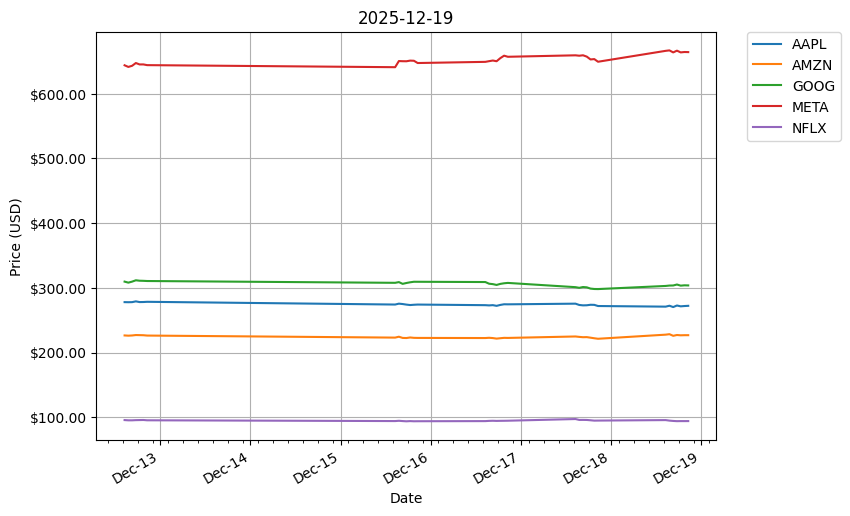

In [8]:
# Create figure / axis for customized plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot close prices passing the axis
df['Close'].plot(ax=ax)

# Get today's date for figure naming
now = dt.datetime.now()
# Set title as date
ax.set_title(now.strftime('%Y-%m-%d'))

# Set x axis label
ax.set_xlabel('Date')
# Set y axis label
ax.set_ylabel('Price (USD)')

# X-axis formatting
# Major ticks - days with labels
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
# Minor ticks: hourly markers without labels
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=4))

# Y-axis formatting
# https://matplotlib.org/stable/gallery/ticks/dollar_ticks.html
ax.yaxis.set_major_formatter('${x:1.2f}')

# Place legend outside the plot area
ax.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.0
    )
# Add grid
ax.grid(True)

# Save the plot to a folder
# Create a figure name with the current date in .png format
figure_name = 'plots/' + dt.datetime.now().strftime('%Y%m%d-%H%M%S') + '.png'
# The dpi parameter sets the resolution of the saved figure
fig.savefig(figure_name,
            dpi=300,
            bbox_inches='tight'
            )

# Show the plot
plt.show()

### Accessing `.csv` files in the `data` folder

As `.png` files can be large, it is more efficient to visualize the data from the most recently saved `.csv` file. To do this, we need:
1. Access the files stored in the `data` directory.
2. Sort files to identify the latest one.

We can list the files in the directory using the `os.listdir()` method (see the [official documentation](https://docs.python.org/3/library/os.html)). This method returns all files and folders in the specified path. To better understand how this method works, I also referred to a [Geeks for Geeks guide](https://www.geeksforgeeks.org/python/python-os-listdir-method/) guide, which provides additional usage examples. 

In [ ]:
# List files in the 'data' folder
data_files = os.listdir('data')

# Display first 5 files in the list
data_files[:5]

['20251122-074415.csv',
 '20251219-090637.csv',
 '20251122-145340.csv',
 '20251129-144550.csv',
 '20251121-091135.csv']

### Sort files
Since files are returned in no specific order, we need to sort them. There are a few ways to sort file names, and here we will use the `list.sort()` method (see the [official documentation](https://docs.python.org/3/howto/sorting.html)). This method sorts the list in place rather than creating a new one. By setting the parameter `reverse=True`, we sort the list in descending order, which places the most recent file at the beginning.

In [ ]:
# Sort files by name in descending order
data_files.sort(reverse=True)

# Display sorted list of files (first 5 files)
data_files[:5]

['20251219-090637.csv',
 '20251218-094702.csv',
 '20251214-172704.csv',
 '20251207-105949.csv',
 '20251206-181234.csv']

### Get the latest file
After sorting the files in descending order, the most recent file appears at the beginning of the list. We can therefore access it by selecting the element at index `0`.

In [11]:
# Pass index 0 to get the most recent file
data_files[0]

'20251219-090637.csv'

### Get `Close` prices

To extract the **Close** prices for all tickers from a CSV file, we use the `pd.read_csv()` function (see the [official documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)). Since the CSV uses a `MultiIndex` for column names (two rows) and includes a Datetime column, we need to handle both correctly.
 - **Header handling**: By passing `header[0,1]`, we read the first two rows to capture both the price type (e.g., Close) and the corresponding ticker.
 - **Datetime handling**: We set the datetime column as the index and parse it as dates using the `index_col` and `parse_dates` parameters. This ensures the DataFrame is properly indexed by time for further analysis.

In [12]:
# Read the most recent CSV file into a DataFrame
latest_df = pd.read_csv('data/' + data_files[0],
                        header=[0, 1], index_col=0, parse_dates=True)

# Display the first 3 rows of the DataFrame
latest_df.head(3)

Price                       Adj Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-12 14:30:00+00:00  277.869995  226.380005  309.589996  644.010010   
2025-12-12 15:30:00+00:00  277.739990  226.020004  308.000000  641.469971   
2025-12-12 16:30:00+00:00  277.855011  226.330002  309.570007  643.219971   

Price                                      Close                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-12 14:30:00+00:00  95.540001  277.869995  226.380005  309.589996   
2025-12-12 15:30:00+00:00  95.154999  277.739990  226.020004  308.000000   
2025-12-12 16:30:00+00:00  95.154999  277.855011  226.330002  309.570007   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
Datetime                                          ...                           
2025-12-12 14:30:00+00:00  644.010010  95.540001  ...  277.795013  230.020004   
2025-12-12 15:30:00+00:00  641.469971  95.154999  ...  277.880005  226.360001   
2025-12-12 16:30:00+00:00  643.219971  95.154999  ...  277.769989  226.000000   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
Datetime                                                                
2025-12-12 14:30:00+00:00  314.809998  650.210022  95.504997  3907328   
2025-12-12 15:30:00+00:00  309.609985  643.929993  95.542000  3485545   
2025-12-12 16:30:00+00:00  308.000000  641.369995  95.154999  2096132   

Price                                                           
Ticker                        AMZN     GOOG     META      NFLX  
Datetime                                                        
2025-12-12 14:30:00+00:00  6052796  3133641  1868580  11663856  
2025-12-12 15:30:00+00:00  3720416  2344376  1448891   3629040  
2025-12-12 16:30:00+00:00  2582048  1633867  1057779   2672382  

[3 rows x 30 columns]

In [13]:
# Extract the 'Close' prices column
closing_price = latest_df['Close']

closing_price.head(3)

Ticker,AAPL,AMZN,GOOG,META,NFLX
Datetime,,,,,
2025-12-12 14:30:00+00:00,277.869995,226.380005,309.589996,644.010010,95.540001
2025-12-12 15:30:00+00:00,277.739990,226.020004,308.000000,641.469971,95.154999
2025-12-12 16:30:00+00:00,277.855011,226.330002,309.570007,643.219971,95.154999


### Automate plotting Close prices from the latest function with a function

Similarly to Problem 1, we can now combine the steps performed earlier into a single function to streamline the process.

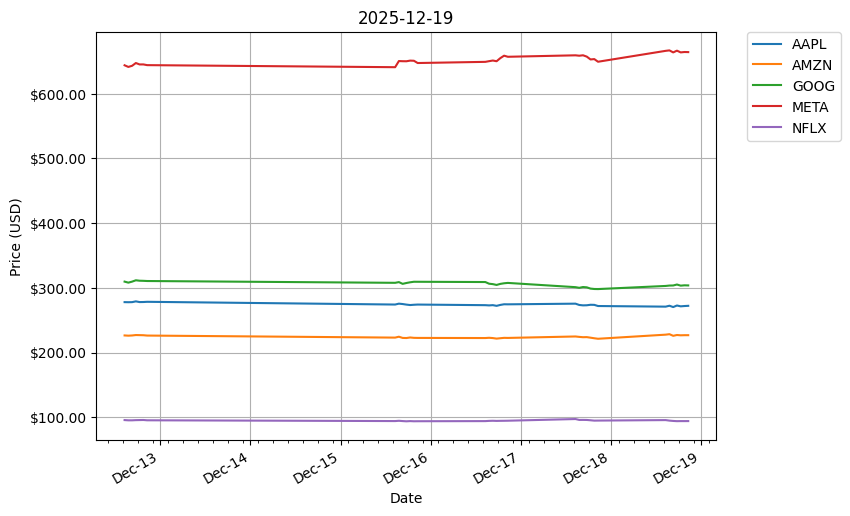

In [14]:
# Create function to plot data for the latest CSV file
def plot_data():
    """Plot the latest CSV file data."""

    # List files in the 'data' folder
    data_files = os.listdir('data')
    # Sort files by name in descending order
    data_files.sort(reverse=True)

    # Read the most recent file
    latest_df = pd.read_csv('data/' + data_files[0],
                            header=[0, 1], index_col=0, parse_dates=True)
    # Select Closing prices
    closing_price = latest_df['Close']

    # Plot close prices passing
    fig, ax = plt.subplots(figsize=(8, 6))
    closing_price.plot(ax=ax)

    # Set title as date using today's date
    now = dt.datetime.now()
    ax.set_title(now.strftime('%Y-%m-%d'))

    # Set X and Y axes labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Price (USD)')

    # X-axis formatting
    ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    # Minor ticks: hourly markers without labels
    ax.xaxis.set_minor_locator(mdates.HourLocator(interval=4))

    # Y-axis formatting
    ax.yaxis.set_major_formatter('${x:1.2f}')

    # Place legend outside the plot area
    ax.legend(bbox_to_anchor=(1.05, 1),
              loc='upper left', borderaxespad=0.)
    # Add grid
    ax.grid(True)

    # Save the plot to a folder
    figure_name = 'plots/' + dt.datetime.now().strftime('%Y%m%d-%H%M%S') + '.png'
    fig.savefig(figure_name, dpi=300, bbox_inches='tight')

    return closing_price

# Call the function to get data and save to CSV
closing_price = plot_data()

## Problem 3: Script

As part of the Problem 3 requirements, a `faang.py` script has been created containing the two previously developed functions: `get_data()` and `plot_data()`. The goal is to make the script executable directly from the terminal by calling the script name. 

### Running the `faang.py` script from the terminal
To ensure a Python script can be executed, the operating system must (1) know how to run it and (2) allow it to run. We address these requirements as follows:

1. **Tell the system it's a Python script**: At the top of the script, we include a shebang line: `#!/usr/bin/env python3`. This informs the system that the file should be executed using Python.
2. **Run the script from the correct location**: To run the script we need to set a path. Since the script resides in the current working directory, we prefix the filename with 
`./`, i.e. `./faang.py`, where: 
    - `.` means “this directory”
    - `./faang.py` means “run the file named faang.py here”.
3. **Check whether the script has execute permission**: We can check the file permissions using `ls -l`. The output might show: `-rw-rw-rw-`. The way to read it is: 
    - **-** is regular file (not a directory)
    - **r** is read permission
    - **w** is write permission
    - **x** is execute permission (missing here)
Permissions are grouped into user (first part), group (second part), and others (third part). 
4. **Add execute permission**: To make the script executable, we add execute permission for the **user** by running through the terminal `chmod u+x faang.py`. In this command **u** stands for *user* and **x** stands for *execute*.Running `ls -l` again should show `-rwxrw-rw-`. 
5. **Run the script again**: Now the script can be executed by calling `./faang.py` in the terminal.

## Problem 4: Automation

The final step of this project is to automate the execution of the `faang.py` script on a schedule using **GitHub Actions workflow** (see the [official documentation](https://docs.github.com/en/actions)). 

To achieve this, a `faang.yml` workflow file was created in the `.github/workflows/` directory. The structure of the workflow was adapted from a suggestion generated with the help of [ChatGPT](https://chatgpt.com/c/693ed8b1-c0a8-832e-a72d-3805e9df8c2a).

### Workflow Structure and Explanation

The YAML blocks below are shown in logical sections for explanation purposes. The full executable workflow is contained in `faang.yml`.


#### Workflow name
```yaml
name: Run faang.yml script on schedule
```
Provides a descriptive name for the workflow, indicating its purpose.

#### Triggers
```yaml
on: 
  schedule:
    - cron: "3 6 * * 6"
  workflow_dispatch:
```
This block defines how and when this workflow is triggered.
  - `schedule:` 
      Enables automated execution based on a time schedule.
  - `- cron:  "3 6 * * 6"`
      - GitHub Actions uses cron syntax to schedule workflows. The five fields represent: `minute, hour, day-of-month, month, weekday`
      - The `*` character means “any value”, i.e. every month/weekday etc.
      - In this configuration, the workflow runs every Saturday (6th day of the week, weekdays start with 0=Sunday) at 06:03 (3 = minute, 6 = hour).
  - `workflow_dispatch:`
Enables a manual button to trigger the workflow.

#### Permissions
```yaml
permissions:
  contents: write
```
  - `permissions:`
  Sets required permissions.
  - `contents: write`
Allows the workflow to commit and push changes to the repository. This permission is not enabled by default and must be explicitly granted because it allows modifying repository contents.

#### Jobs
```yaml
jobs:
  run-faang: 
    runs-on: ubuntu-latest 
```
  - `jobs:` 
  Specifies jobs for the workflow to execute.
  - `run-faang:` 
  Name of the job.
  - `runs-on: ubuntu-latest`
  Specifies that the job runs on a Linux virtual machine.

#### Job steps    
```yaml
steps:
  - name: Checkout repository
    uses: actions/checkout@v4

  - name: Set up Python
    uses: actions/setup-python@v5
    with:
      python-version: "3.11"

  - name: Install dependencies
    run: |
      python -m pip install --upgrade pip
      pip install -r requirements.txt

  - name: Run faang.py
    run: |
      python faang.py

  - name: Commit changes
    run: |
      git config user.name "github-actions[bot]"
      git config user.email "github-actions[bot]@users.noreply.github.com"

      git add .
      git diff --cached --quiet || git commit -m "Automated update from faang.py"

  - name: Push changes
    run: |
      git push
```

  - `steps:` 
  Defines the sequence of actions performed in the job.

**Checkout repository**
  - `- name: Checkout repository`
  The workflow is instructed to check out the repository contents to access project files.
  - `uses: actions/checkout@v4` 
  Uses pre-configured actions script.

**Set up Python**
  - `- name: Set up Python` 
  Set up Python and specify the required version.
  - `uses: actions/setup-python@v5` 
  Uses pre-configured actions script.
  - `with:`
    - `python-version: "3.11"` 
Specify the Python version the workflow should use.

**Install dependencies**
  - `- name: Install dependencies` 
  Install dependencies or required packages to run the script.
  - `run: |`
    - `python -m pip install --upgrade pip` 
      Install or upgrade `pip`.
    - `pip install -r requirements.txt` 
      Install all required Python packages listed in `requirements.txt`.
            
**Run the script**
  - `- name: Run faang.py` 
  Execute the `faang.py` script.
  - `run: |`
    - `python faang.py` 
    Execute the script.

**Commit changes**
  - `- name: Commit changes`
  Commit changes after the script has been run.
  - `run: |`
    - `git config user.name "github-actions[bot]"` 
      Configures Git author name for this workflow’s commits.
    - `git config user.email "github-actions[bot]@users.noreply.github.com"` 
      Configures Git author email.
    - `git add .` 
      Stages all changes to the repository, i.e. downloading data and plotting data for `faang.py`. 
    - `git diff --cached --quiet || git commit -m "Automated update from faang.py"`
      Checks for any staged changes and commits changes only if differences exist:
      - If `git diff --cached --quiet` exits with:
          - 0 > then no changes > skip commit
          - 1 > then changes detected > commit changes.

**Push changes**
  - `- name: Push changes`
  Push changes back to the repository.
  - `run: |`
    - `git push`
      Pushes committed changes back to the repository.

# End